## **Prediction Tutorial**
> Simulates "true data" corrected by acceptance, according to\
> the fitted values for the amplitude

In [1]:
import PyPWA as pwa
import numpy as npy
import pandas
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Define waves and amplitude (function) to simulate

In [2]:
initial=[]
for param_type in ["r", "i"]:
    initial.append(f"{param_type}.1.0.0")
    initial.append(f"{param_type}.1.1.0")
    initial.append(f"{param_type}.1.1.1")
    initial.append(f"{param_type}.1.2.0")
    initial.append(f"{param_type}.1.2.1")
    initial.append(f"{param_type}.1.2.2")
#import AmplitudeOLDfit
#amp = AmplitudeOLDfit.FitAmplitude(initial)
#
import AmplitudeJPACsim
amp = AmplitudeJPACsim.NewAmplitude()
#
#import AmplitudeJPACfit
#amp = AmplitudeJPACfit.FitAmplitude(initial)

# Read input (flat) simulated (generated) data

In [3]:
data = pwa.read("etapiHEL_flat.txt")

> Read flat data in gamp format (full information)

In [4]:
datag = pwa.read("../TUTORIAL_FILES/raw_events.gamp")

*Define number of bins (MUST be the same as the fitted parameters)*

In [5]:
nbins=20
bins = pwa.bin_by_range(data, "mass", nbins, .6, 2.0)

*Calculate the mass value and number of events in each bin*

In [6]:
bmass=[]
mcounts=[]
for index, bin in enumerate(bins):
    if len(bin)==0:
        bmass.append(0.)
        mcounts.append(0.)
    else:
        bmass.append(npy.average(bin["mass"]))
        mcounts.append(len(bin))

# Read parameters from fit

In [7]:
par = pwa.read("final_values_JPAC.csv")

*Prepare for a binned simulation*
> Find intensities in each bin and max intensity for each bin.

In [8]:
int_values = []
max_values = []
params={}
for index, bin in enumerate(bins):
    for param_type in ["r", "i"]:
        params.update({f"{param_type}.1.0.0":par[f"{param_type}.1.0.0"][index]})
        params.update({f"{param_type}.1.1.0":par[f"{param_type}.1.1.0"][index]})
        params.update({f"{param_type}.1.1.1":par[f"{param_type}.1.1.1"][index]})
        params.update({f"{param_type}.1.2.0":par[f"{param_type}.1.2.0"][index]})
        params.update({f"{param_type}.1.2.1":par[f"{param_type}.1.2.1"][index]})
        params.update({f"{param_type}.1.2.2":par[f"{param_type}.1.2.2"][index]})


    [int,intmax] = pwa.simulate.process_user_function(amp,bin,params,16)
    int_values.append(int)
    max_values.append(intmax)

# Simulate events for each bin (produce mask and mask them)

In [9]:
rejected_bins = []
masked_final_values = []
for int_value, bin in zip(int_values, bins):
    rejection = pwa.simulate.make_rejection_list(int_value, max_values)
    rejected_bins.append(bin[rejection])
    masked_final_values.append(int_value[rejection])

*Check how many events simulated by bin*

In [10]:
for index, simulated_bin in enumerate(rejected_bins):
    print(
        f"Bin {index+1}'s length is {len(simulated_bin)}, "
        f"{(len(simulated_bin) / len(bin)) * 100:.2f}% events were kept"
    )

Bin 1's length is 4850, 1.79% events were kept
Bin 2's length is 6545, 2.42% events were kept
Bin 3's length is 10388, 3.84% events were kept
Bin 4's length is 25492, 9.42% events were kept
Bin 5's length is 65913, 24.34% events were kept
Bin 6's length is 27495, 10.15% events were kept
Bin 7's length is 15419, 5.69% events were kept
Bin 8's length is 17872, 6.60% events were kept
Bin 9's length is 31916, 11.79% events were kept
Bin 10's length is 45793, 16.91% events were kept
Bin 11's length is 20121, 7.43% events were kept
Bin 12's length is 10427, 3.85% events were kept
Bin 13's length is 10301, 3.80% events were kept
Bin 14's length is 12541, 4.63% events were kept
Bin 15's length is 15215, 5.62% events were kept
Bin 16's length is 18517, 6.84% events were kept
Bin 17's length is 17288, 6.39% events were kept
Bin 18's length is 12478, 4.61% events were kept
Bin 19's length is 8226, 3.04% events were kept
Bin 20's length is 5718, 2.11% events were kept


*Stak data for all bins in one file (new_data)*

In [11]:
for index, the_bin in zip(range(len(rejected_bins)), rejected_bins):
    if index ==0: 
        new_data=pandas.DataFrame(the_bin)

    new_data =  new_data.append(the_bin,ignore_index=True)

#print(new_data)

In [12]:
new_data

,EventN,theta,phi,alpha,pol,tM,mass
0,432.0,1.075030,3.11080,-2.279760,0.4,-0.036087,0.730692
1,3277.0,1.106290,1.62386,2.912540,0.4,-0.021695,0.706537
2,5034.0,2.092900,1.77176,-1.243810,0.4,-0.065768,0.730773
3,5547.0,0.201674,-1.60246,-1.418660,0.4,-0.028844,0.701134
4,6527.0,1.325940,3.00931,-1.637510,0.4,-0.023814,0.722924
...,...,...,...,...,...,...,...
387360,9849089.0,1.940630,-1.85137,1.307640,0.4,-0.521166,1.968390
387361,9851359.0,1.055120,-2.61521,-2.743190,0.4,-0.403025,1.960020
387362,9853817.0,0.189324,-1.00286,-1.850720,0.4,-0.370487,1.944500
387363,9854636.0,1.043920,2.97397,-0.604751,0.4,-0.325758,1.971750


# Calculate the number of expected events versus mass bins

In [13]:
total_nExp = npy.empty(len(rejected_bins))
for index, the_bin in zip(range(len(rejected_bins)), rejected_bins):

    for param_type in ["r", "i"]:
        params.update({f"{param_type}.1.0.0":par[f"{param_type}.1.0.0"][index]})
        params.update({f"{param_type}.1.1.0":par[f"{param_type}.1.1.0"][index]})
        params.update({f"{param_type}.1.1.1":par[f"{param_type}.1.1.1"][index]})
        params.update({f"{param_type}.1.2.0":par[f"{param_type}.1.2.0"][index]})
        params.update({f"{param_type}.1.2.1":par[f"{param_type}.1.2.1"][index]})
        params.update({f"{param_type}.1.2.2":par[f"{param_type}.1.2.2"][index]})
    amp.setup(the_bin)
    total_nExp[index] = npy.average(amp.calculate(params))

*Plot number of true (100% acc) events versus mass*

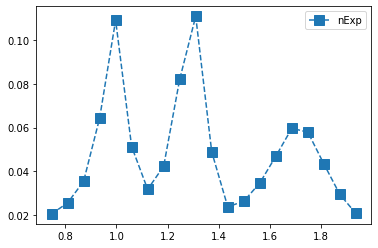

In [14]:

mni = npy.empty(len(total_nExp), dtype=[("mass", float), ("int", float)])
mni["mass"] = bmass
mni["int"] = total_nExp
mni = pandas.DataFrame(mni)
counts, bin_edges = npy.histogram(mni["mass"], nbins, weights=mni["int"])

centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Add yerr to argment list when we have errors
yerr = npy.empty(nbins)
yerr = npy.sqrt(counts)
yerr=0.
plt.errorbar(centers,counts, yerr, fmt="s",linestyle="dashed",markersize='10',label="nExp")

#plt.xlim(.6, 3.2)
#plt.ylim(0.,65000)
plt.legend(loc='upper right')
plt.show()

# Calculate Phase difference between two waves

In [15]:
V1=npy.ndarray(len(par))
V2=npy.ndarray(len(par))
V1 = par["r.1.1.1"]+par["i.1.1.1"]*(1j)                                   
V2 = par["r.1.2.1"]+par["i.1.2.1"]*(1j)                                                                        
if V1.all() != 0 and V2.all() != 0:
    phasediff = npy.arctan(npy.imag(V1*npy.conj(V2))/npy.real(V1*npy.conj(V2)))

*Plot PhaseMotion*

(0.6, 3.2)

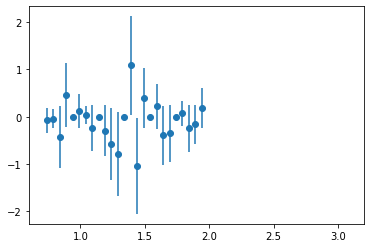

In [16]:
mnip = npy.empty(len(bins), dtype=[("mass", float), ("phase", float)])
mnip["mass"] = bmass
mnip["phase"] = phasediff
mnip = pandas.DataFrame(mnip)
counts, bin_edges = npy.histogram(mnip["mass"], 25, weights=mnip["phase"])
centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Add yerr to argment list when we have errors
yerr = npy.empty(100)
yerr = npy.sqrt(npy.abs(counts))
plt.errorbar(centers,counts, yerr, fmt="o")
plt.xlim(0.6, 3.2)

*Plot phi_HEL vs cos(theta_HEL) of predicted data (with 4 different contracts(gamma))*

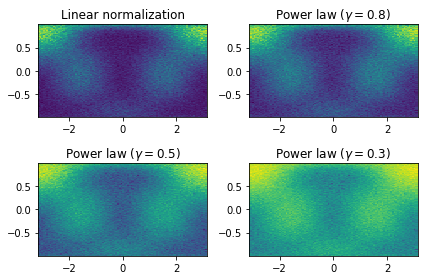

In [17]:
import matplotlib.colors as mcolors
from numpy.random import multivariate_normal

gammas = [0.8, 0.5, 0.3]

fig, axes = plt.subplots(nrows=2, ncols=2)

axes[0, 0].set_title('Linear normalization')
axes[0, 0].hist2d(new_data["phi"], npy.cos(new_data["theta"]), bins=100)
#axes[0, 0].hist2d(cut_list["phi"], npy.cos(cut_list["theta"]), bins=100)

for ax, gamma in zip(axes.flat[1:], gammas):
    ax.set_title(r'Power law $(\gamma=%1.1f)$' % gamma)
    ax.hist2d(new_data["phi"], npy.cos(new_data["theta"]),
        bins=100, norm=mcolors.PowerNorm(gamma))
    
fig.tight_layout()

plt.show()

*Plot cos(theta_HEL) vs mass for simulated data (with 4 different contrasts)*

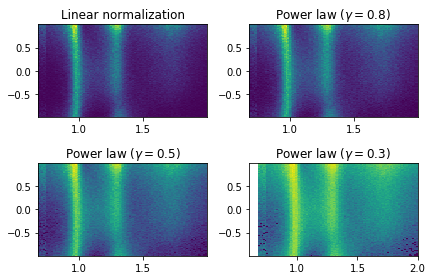

In [18]:
gammas = [0.8, 0.5, 0.3]

fig, axes = plt.subplots(nrows=2, ncols=2)

axes[0, 0].set_title('Linear normalization')
axes[0, 0].hist2d(new_data["mass"], npy.cos(new_data["theta"]),bins=100)

for ax, gamma in zip(axes.flat[1:], gammas):
    ax.set_title(r'Power law $(\gamma=%1.1f)$' % gamma)
    ax.hist2d(new_data["mass"], npy.cos(new_data["theta"]),
              bins=100, norm=mcolors.PowerNorm(gamma))
    

fig.tight_layout()
plt.xlim(.6, 2.)
plt.show()

*Plot phi_HEL vs mass for simulated data (with 4 different contrasts)*

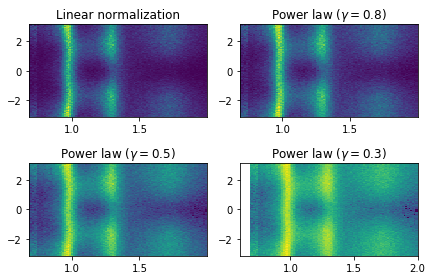

In [19]:
gammas = [0.8, 0.5, 0.3]

fig, axes = plt.subplots(nrows=2, ncols=2)

axes[0, 0].set_title('Linear normalization')
axes[0, 0].hist2d(new_data["mass"], new_data["phi"],bins=100)

for ax, gamma in zip(axes.flat[1:], gammas):
    ax.set_title(r'Power law $(\gamma=%1.1f)$' % gamma)
    ax.hist2d(new_data["mass"], new_data["phi"],
              bins=100, norm=mcolors.PowerNorm(gamma))
    

fig.tight_layout()
plt.xlim(.6, 2.)
plt.show()

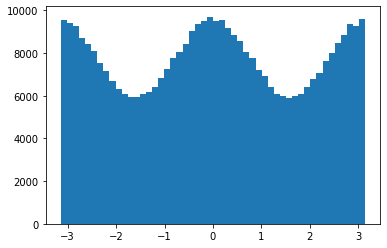

In [20]:
plt.hist(new_data["alpha"],50)
plt.show()

*Plot mass versus alpha/Phi*

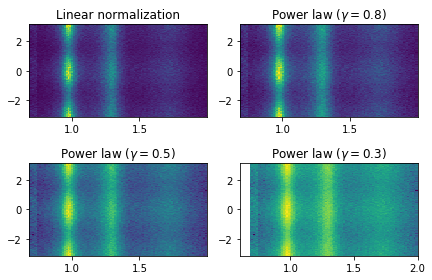

In [21]:
gammas = [0.8, 0.5, 0.3]

fig, axes = plt.subplots(nrows=2, ncols=2)

axes[0, 0].set_title('Linear normalization')
axes[0, 0].hist2d(new_data["mass"], new_data["alpha"],bins=100)

for ax, gamma in zip(axes.flat[1:], gammas):
    ax.set_title(r'Power law $(\gamma=%1.1f)$' % gamma)
    ax.hist2d(new_data["mass"], new_data["alpha"],
              bins=100, norm=mcolors.PowerNorm(gamma))
    

fig.tight_layout()
plt.xlim(.6, 2.)
plt.show()

*Plot mass versus alpha/Phi*

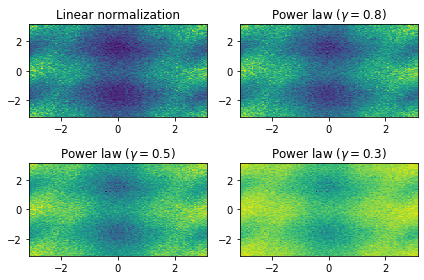

In [22]:
gammas = [0.8, 0.5, 0.3]

fig, axes = plt.subplots(nrows=2, ncols=2)

axes[0, 0].set_title('Linear normalization')
axes[0, 0].hist2d(new_data["phi"],new_data["alpha"],bins=100)

for ax, gamma in zip(axes.flat[1:], gammas):
    ax.set_title(r'Power law $(\gamma=%1.1f) $' % gamma)
    ax.hist2d(new_data["phi"], new_data["alpha"],
              bins=100, norm=mcolors.PowerNorm(gamma))
    

fig.tight_layout()

plt.show()

# Write predicted (true) data to disk

In [23]:
new_data.to_csv("predictedjpac.csv", index=False)

> Write gamp format predicted to data (true)

In [21]:
x = (data["EventN"]).astype(int)
y = (new_data["EventN"]).astype(int)

predm = npy.isin(x,y)
pdatag = datag[predm]
pwa.write("raw_predicted.gamp",pdatag)

> Write predicted accepted data
>> events.pf is a mask of accepted data that has been produced by Geant

In [24]:
acc = pwa.read("events.pf")
accn = acc.to_numpy()

mask_acc_phy = npy.logical_and(predm,accn)
pdatag_acc = datag[mask_acc_phy]
pdata_acc = data[mask_acc_phy]

pdata_acc.to_csv("predictedJPAC_ACC.csv", index=False)
pwa.write("acc_predictedJPAC.gamp",pdatag_acc)